Logistic Regression aims to solve classification problems. It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.

In [ ]:
#simple implementation
import numpy 
from sklearn import linear_model

X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1) #become (12,1) -> expected input is 2D array
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr=linear_model.LogisticRegression()
logr.fit(X,y)

predicted=logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted) #1 means cancerous, 0 means not cancerous




[0]


   Age  Salary  Purchased
0   22   20000          0
1   25   22000          0
2   47   42000          1
3   52   50000          1
4   46   41000          1
Class distribution in y_test:
 Purchased
1    2
0    1
Name: count, dtype: int64
Accuracy Score(How many predictions were correct overall?) : 1.0
Confusion matrix:
 [[1 0]
 [0 2]]


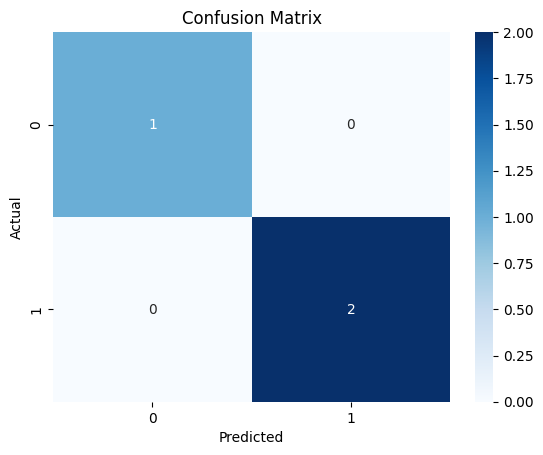

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [9]:
#project : using sample data and following all steps
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


#load the data
df=pd.read_csv("sample_logistic_data.csv")
print(df.head())

#Split into features and target
#features are age and salary, purchased is the target

X=df[["Age","Salary"]]
y=df["Purchased"]

#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

print("Class distribution in y_test:\n", y_test.value_counts())


#train logistic regression model
model=LogisticRegression()
model.fit(X_train,y_train)

#Evaluation methods

#accuracy score
y_pred=model.predict(X_test)

acc=accuracy_score(y_test,y_pred)
print("Accuracy Score(How many predictions were correct overall?) :",acc)

#confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm)

#visualising confusion matrix
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Classification Report
print(classification_report(y_test,y_pred))